# Data Analysis and Visualisation - Spotify Top 10s

This notebook is being used to analyse the spotify top 10 dataset to asssess its suitability to be used to develop a regression decision tree
https://www.kaggle.com/datasets/leonardopena/top-spotify-songs-from-20102019-by-year/data

Based on Tutorial 1 (housing) Data Exploration and Visualization (Getting to know your data)

## Setup

In [3]:
import sys
import sklearn
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Exploring the data

The data was originally extracted from http://organizeyourmusic.playlistmachinery.com/# and has the following columns:

Genre - the genre of the track <br>
Year - the release year of the recording. Note that due to vagaries of releases, re-releases, re-issues and general madness, sometimes the release years are not what you'd expect <br>
Added - the earliest date you added the track to your collection <br>
Beats Per Minute (BPM) - The tempo of the song <br>
Energy - The energy of a song - the higher the value, the more energtic song <br>
Danceability - The higher the value, the easier it is to dance to this song <br>
Loudness (dB) - The higher the value, the louder the song <br>
Liveness - The higher the value, the more likely the song is a live recording <br>
Valence - The higher the value, the more positive mood for the song <br>
Length - The duration of the song <br>
Acousticness - The higher the value the more acoustic the song is <br>
Speechiness - The higher the value the more spoken word the song contains <br>
Popularity - The higher the value the more popular the song is <br>
Duration - The length of the song <br>

The data was then uploaded to Kaggle and sourced from there (https://www.kaggle.com/datasets/leonardopena/top-spotify-songs-from-20102019-by-year) 

The Kaggle data has shortened column names, mapped (organizeyourmusic -> Kaggle):

Title -> title <br>
Artist -> artist <br>
Genre -> top genre <br>
Year -> year <br>
Beats Per Minute (BPM) -> bpm <br>
Energy -> nrgy <br>
Danceability -> dnce <br>
Loudness (dB) -> dB <br>
Liveness -> live <br>
Valence -> val <br>
Acousticness -> acous <br>
Speechiness -> spch <br>
Popularity -> pop <br>
Duration -> dur <br>

# Get the data

Dataset downloaded using the kaggle command line tool and placed in the local directory:

kaggle datasets download -d leonardopena/top-spotify-songs-from-20102019-by-year

unzip top-spotify-songs-from-20102019-by-year.zip

The result is a file called "top10s.csv"

In [1]:
# update the filename on the local filesystem so its more specific to what the file contains

os.rename('C:/Users/Mark/Documents/repos/group-coursework-ha/datatop10s.csv', 'C:/Users/Mark/Documents/repos/group-coursework-ha/data/spotify_top10_data.csv')

In [7]:
# create a pandas DataFrame called "spotify" containing the data

spotify = pd.read_csv('C:/Users/Mark/Documents/repos/group-coursework-ha/data/spotify_top10_data.csv', encoding = 'ansi')

In [8]:
# display the top five rows of the DataFrame for some initial analysis

spotify.head() 

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [9]:
# print information about DataFrame including the dtype and columns, non-null values and memory usage

spotify.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


# Data analysis

The file contains 602 entries (plus a title row), with no missing values in any of the columns <br>
The csv file from Kaggle uses ANSI encoding

There are 14 "data" columns in total, column 0 is an index

3 columns object data types - title, artist and top genre <br>
11 columns int64 data types - year, bpm, nrgy, dnce, dB, live, val, dur, acous, spch, pop

In [11]:
# use the Pandas value counts function to count the frequency of some of the important columns

# the top genre column is the most important as it will be what the model is predicting

spotify["top genre"].value_counts()

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
complextro                     6
hip pop                        6
australian dance               6
atl hip hop                    5
australian pop                 5
edm                            5
permanent wave                 4
latin                          4
hip hop                        4
colombian pop                  3
tropical house                 3
brostep                        2
downtempo                      2
electronic trap                2
belgian edm                    2
escape room                    2
folk-pop                       2
electro                        2
indie pop                      2
detroit hi

In [33]:
spotify["artist"].value_counts()

Katy Perry             17
Justin Bieber          16
Rihanna                15
Maroon 5               15
Lady Gaga              14
                       ..
Iggy Azalea             1
5 Seconds of Summer     1
Michael Jackson         1
Disclosure              1
Daddy Yankee            1
Name: artist, Length: 184, dtype: int64

In [41]:
# show a statistical summary of the numerical attributes 

spotify.describe() 

,Unnamed: 0,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,174.215384,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [40]:
# show a statistical summary of the numerical attributes 
# but ignore the first "index" column

spotify.iloc[:,1:].describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


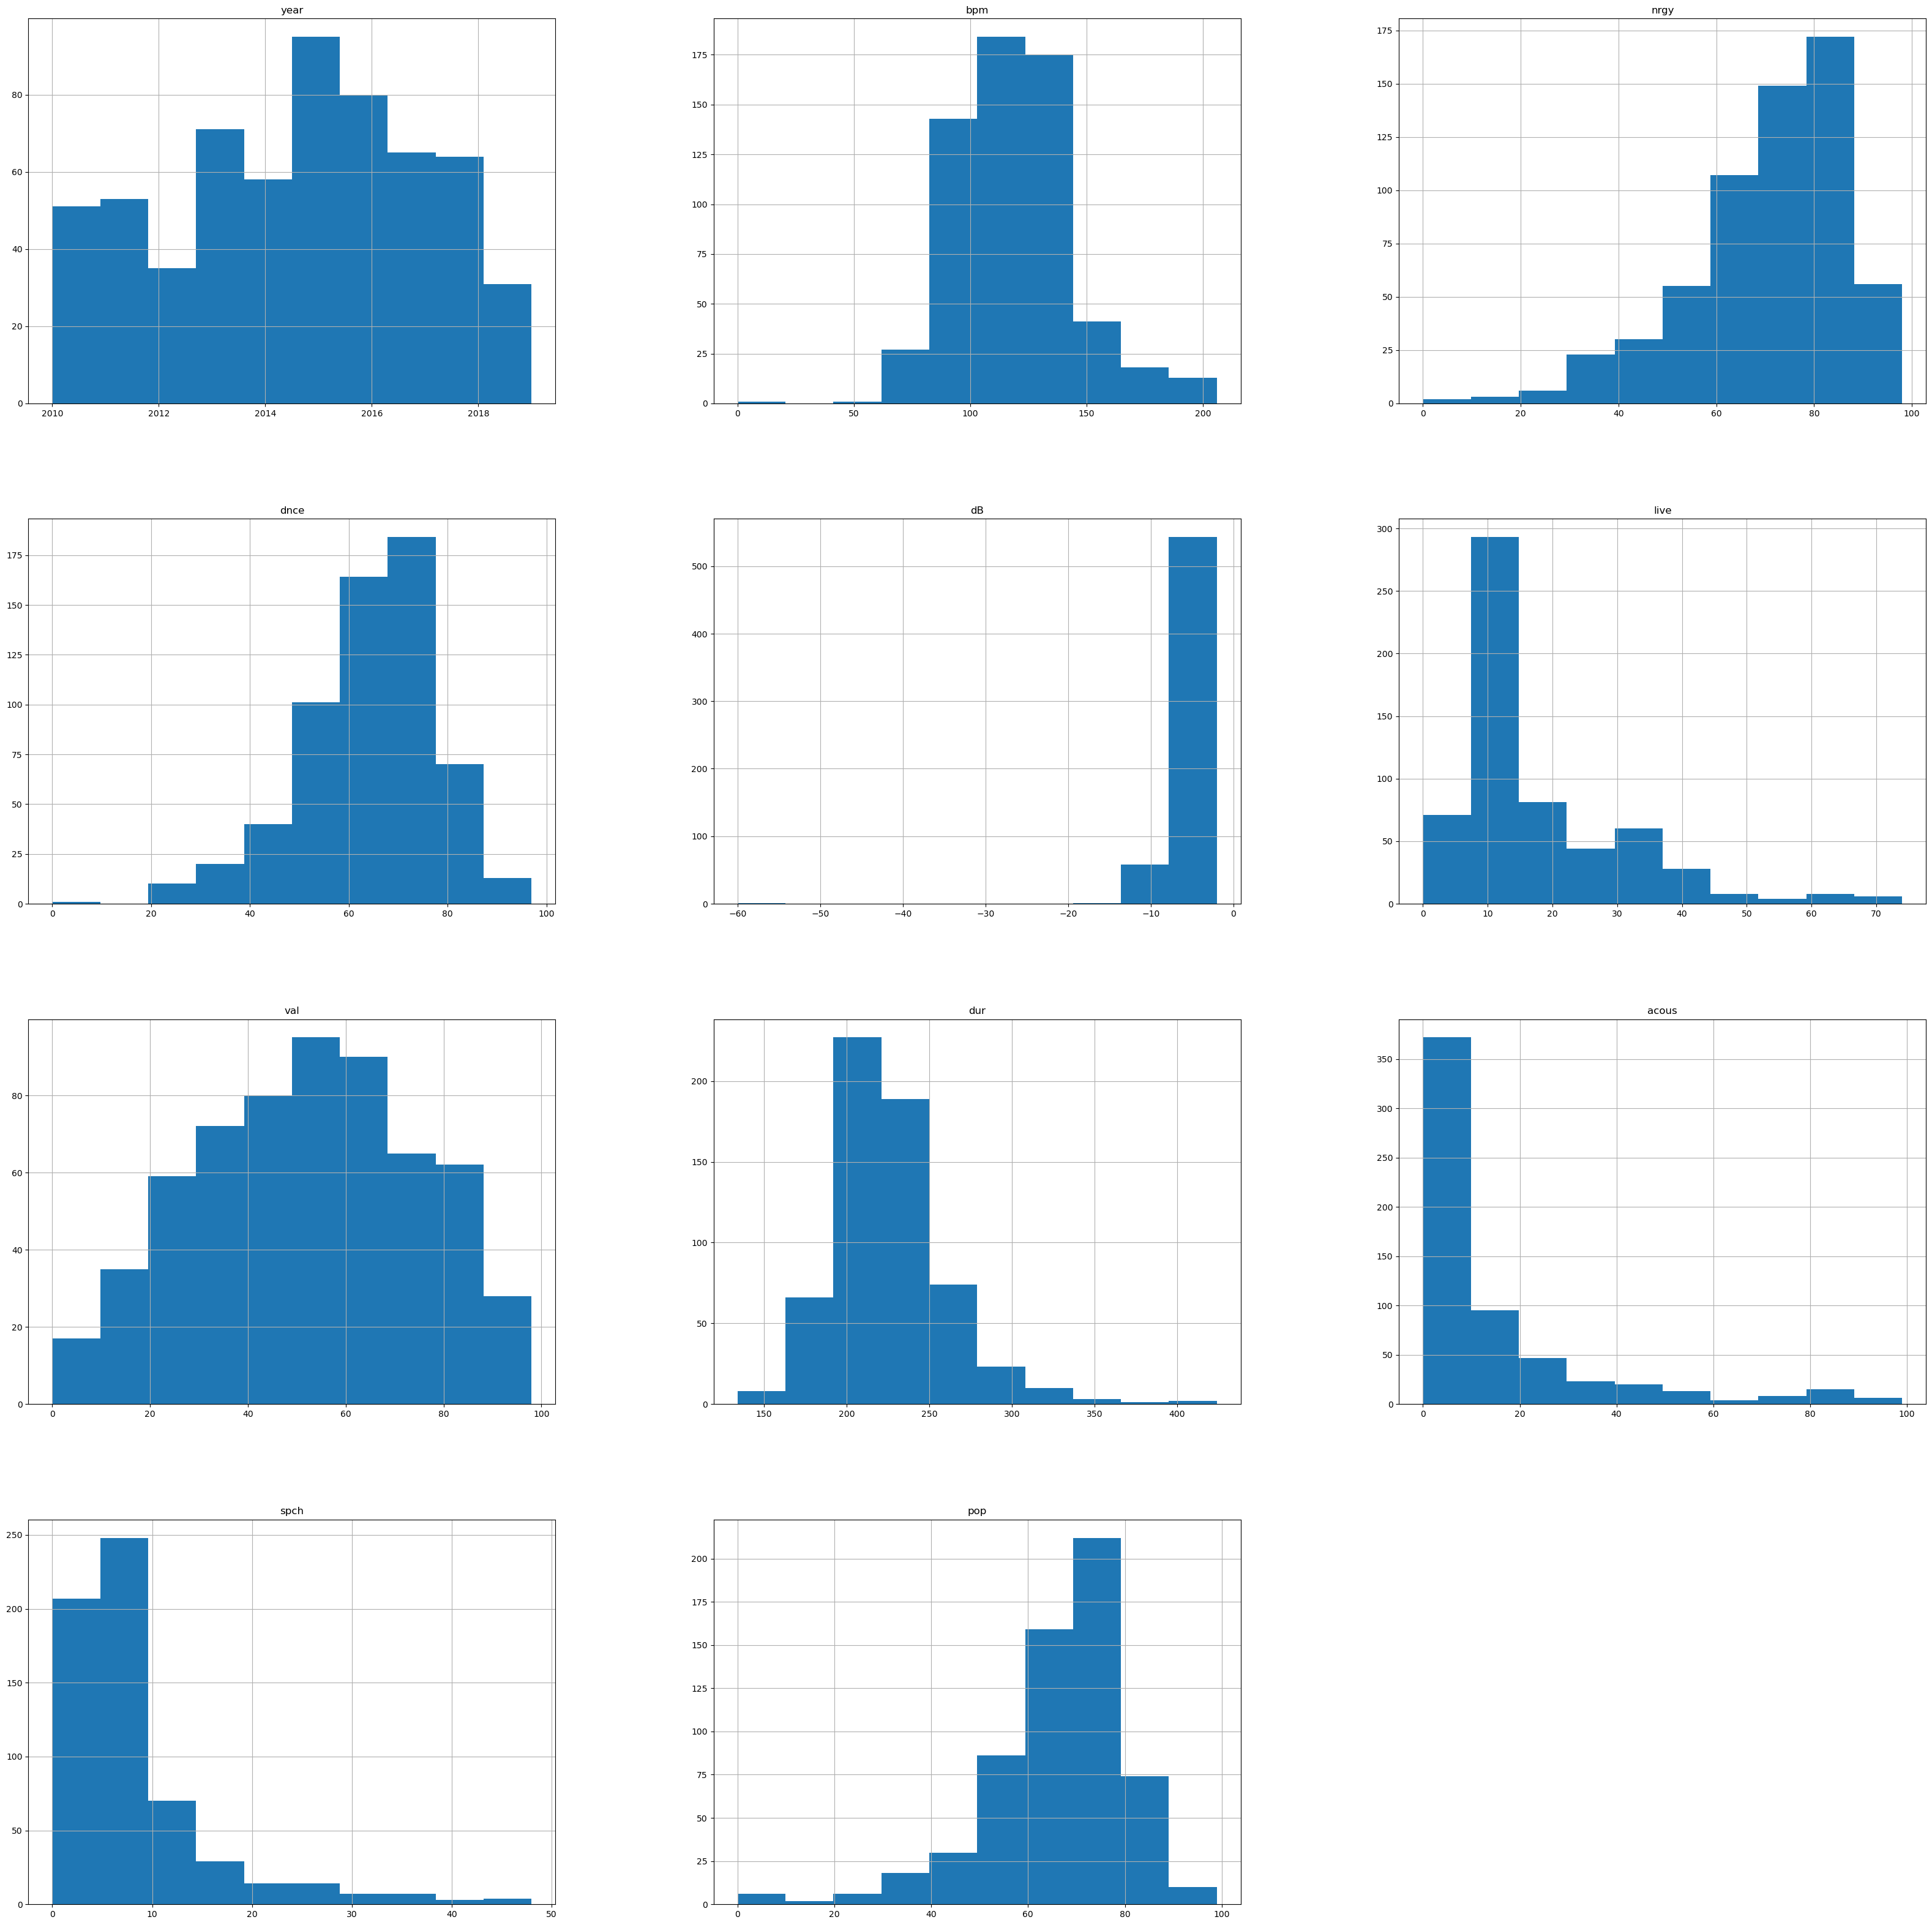

In [57]:
# plot a histogram for each numerical attribute

# check for data skewing, outliers and anomalies

histogram = spotify.hist(column=['year','bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop'], figsize=(40,40), bins=10)

# Privacy, ethical and licensing considerations

Privacy and ethical considerations with dataset - none, no PII data included <br>
License - "Other (specified in description)", however, there is no licence specified on the dataset listing
According to "Common license types for datasets" on the Kaggle website (source: https://www.kaggle.com/discussions/general/116302) no license specified means "no one can use, share, distribute, re-post, add to, transform or change your dataset if you have not specified a license"

This suggests the dataset cannot be used, however, as this dataset would be used in academic context, rather than commercial, it seems unlikely there would be any licensing challenges


# Data cleanup tasks

1) Remove the index column from the file as its not necessary <br>
2) Update the column headings to the values from the original dataset on organizeyourmusic, they are more descriptive and meaningful

# Challenges with the data

The data in the genre column is heavily skewed <br>
Of the 602 entries, 327 have the same genre (dance pop) <br>
There are 50 distinct genres, but 36 genres have 5 or less entries in the dataset <br>
The loudness column is also heavily skewed

# Conclusions

This dataset won't be used for any experiments.

The primary reason this dataset isn't suitable for regression decision tree models is the genre column is heavily skewed. Many of the genres also have a very limited number of samples, which would impact the ability to train the model on enough data to produce effective predictions of the Rating.
